**Redes neuronales simples (RNN) utilizando PyTorch usando el dataset MNIST**

El desarrollo de este proyesto permite conocer el uso de redes neuronales simples utilizando PyTorch. Al implementar y entrenar una red sobre el dataset MNIST, que es ampliamente usado en tareas de reconocimiento de dígitos escritos a mano (pictogramas):

- Comprender los conceptos básicos de redes neuronales, como capas, funciones de activación y retropropagación.

- Familiarizarse con PyTorch, una herramienta esencial en investigación y desarrollo en Inteligencia Artificial.

- Analizar resultados y realizar ajustes a los parámetros del modelo para observar cómo afectan el desempeño.

- Desarrollar habilidades prácticas de codificación en ambientes colaborativos como Google Colab.

Este ejercicio mejora la capacidad de identificar patrones en datos visuales, fomenta un pensamiento lógico para resolver problemas y ofrece una experiencia fundamental en el aprendizaje de máquina (Machine Learning).

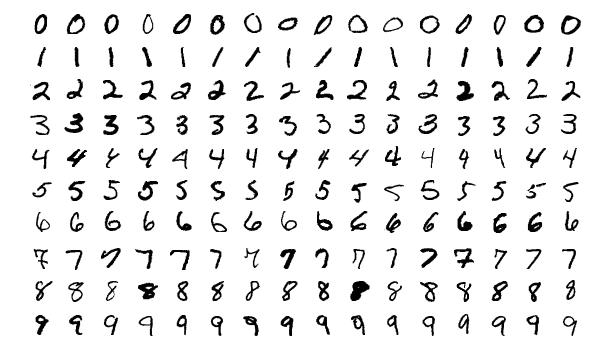

**Importación de las librerías necesarias.**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

**Descarga del dataset MNIST.**

Normalización de las imágenes para que los valores de los píxeles estén entre -1 y 1, mejorando la convergencia del modelo.

In [2]:
# **Definir los hiperparámetros**
batch_size = 64  # Número de imágenes procesadas en paralelo
learning_rate = 0.01  # Tasa de aprendizaje
epochs = 5  # Número de pasadas completas al dataset

# **Transformación de los datos**
# Normalizamos las imágenes para que los valores estén en el rango [0, 1].
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# **Cargar el dataset MNIST**
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# DataLoaders para iterar sobre los datos
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 54.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 5.36MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.71MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.75MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**Definición de la arquitectura de la red neuronal.**

Se implementa una red neuronal simple con una capa oculta de 128 neuronas y funciones de activación ReLU.

La salida tiene 10 neuronas, correspondientes a las clases de dígitos.


In [14]:
# **Definir la arquitectura de la red neuronal**
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Definimos las capas
        self.flatten = nn.Flatten()  # Convierte las imágenes 28x28 en un vector de 784 elementos
        self.fc1 = nn.Linear(28*28, 256)  # Capa totalmente conectada de 784 a 128 neuronas
        self.relu = nn.ReLU()  # Función de activación ReLU
        self.fc2 = nn.Linear(256, 10)  # Capa de salida con 10 clases (dígitos 0-9)
        self.softmax = nn.LogSoftmax(dim=1)  # Probabilidades logarítmicas para clasificación

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

# Crear una instancia del modelo
model = SimpleNN()

# **Definir la función de pérdida y el optimizador**
criterion = nn.NLLLoss()  # Pérdida de máxima negativa
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


**Entrenamiento y evaluación del modelo.**

Se usa optimización por gradiente estocástico (SGD) con una función de pérdida adecuada para clasificación.

In [15]:
# **Entrenamiento del modelo**
for epoch in range(epochs):
    model.train()  # Modo entrenamiento
    total_loss = 0

    for images, labels in train_loader:
        optimizer.zero_grad()  # Limpiar gradientes previos
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calcular pérdida
        loss.backward()  # Backpropagation
        optimizer.step()  # Actualización de parámetros
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Pérdida: {total_loss/len(train_loader):.4f}")

# **Evaluación del modelo**
model.eval()  # Modo evaluación
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Exactitud en el conjunto de prueba: {accuracy:.2f}%')

Epoch [1/5], Pérdida: 0.7321
Epoch [2/5], Pérdida: 0.3653
Epoch [3/5], Pérdida: 0.3205
Epoch [4/5], Pérdida: 0.2942
Epoch [5/5], Pérdida: 0.2726
Exactitud en el conjunto de prueba: 92.75%



**Visualización de imágenes del dataset con sus predicciones.**

Se calcula la exactitud relativa del modelo en datos de prueba y la visualización de las predicciones de algunas imágenes.

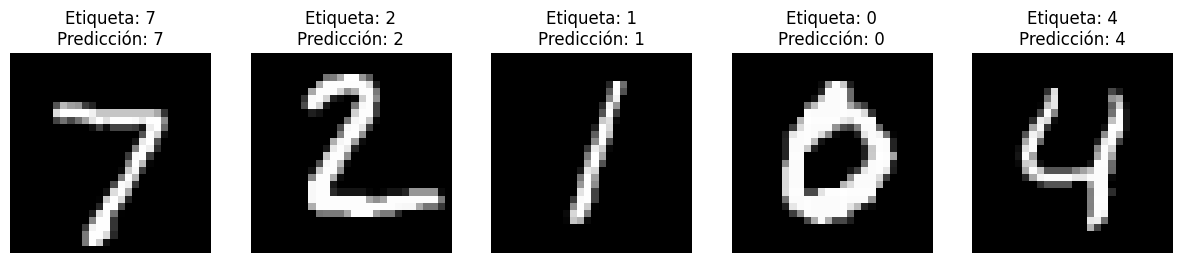

In [20]:
# **Visualizar algunas predicciones**
examples = iter(test_loader)
example_images, example_labels = next(examples)

with torch.no_grad():
    outputs = model(example_images)
    _, predictions = torch.max(outputs, 1)

# Mostrar imágenes con sus etiquetas y predicciones
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(example_images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Etiqueta: {example_labels[i]}\nPredicción: {predictions[i]}")
    axes[i].axis('off')

plt.show()